# Predicting Prices of AirBnB in Newyork location

##### NAME :Anuradha Mantena
UIN : 01167161

### Project Overview :

New York, New York isn’t this everyone’s favourite city? Tourism is a vital industry for New York City. When we plan any vacation or travel, the first thing that we look for are hotels, motels or airbnbs. Comparitively Airbnb's are becoming more famous and reliable since they give us a homely feeling even when we travel to a new city. This is one of unique aspects as of why airbnb are gaining its hand over the other Hotels and Motels. Also we have observed that airbnb's are more cheap when compared to the Hotels and Motels.

##### Objective : 
Analyze and visualize the factors that are contributing to the Airbnb price using Exploratory Data Analysis (EDA) and predict the Airbnb price using machine learning techniques. The main objective is to help the owner to place a competitive price.

### Data Source :
This Data set consists of all needed information that is required to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions. This dataset has around 49,000 observations with 16 columns and it is a mix between categorical and numeric values.

Here is the link to my Data Set: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data


### Table of Contents

1. Data Collection
2. Data Cleaning
3. Exploratory Data Analysis
4. Data Modelling 

   a) Phase I - Considering with all features                                                                                      
   b) Phase II - Considering with few features
    
    
5. Model Evaluation
6. Conclusion & Summary
7. References

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

### 1. Data Collection 

In [2]:
data=pd.read_csv('AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
data.shape

(48895, 16)

This dataset has around 49,000 observations with 16 columns and it is a mix of categorical and numeric values.

### 2. Data Cleaning

#### Check for the data type of every column in the dataset

In [4]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Observation : This data set contains both categorical and numerical values

#### Droping unnecessary columns

In [5]:
data.drop(['id','host_name','name','last_review'], axis=1, inplace=True)

In [6]:
data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


#### Check for the null values in each column

In [7]:
data.isnull().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Replacing null values in the columns with 0 in the dataset

In [8]:
data['reviews_per_month'].fillna(0,inplace = True)
data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [9]:
data.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### 3. Exploratory Data Analysis

#### Checking unique values and count in column host_id

In [10]:
data.host_id.unique()

array([     2787,      2845,      4632, ..., 274321313,  23492952,
        68119814])

Finding the top 10 host id listings

In [11]:
host_id= data.host_id.value_counts().head(10)
host_id

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

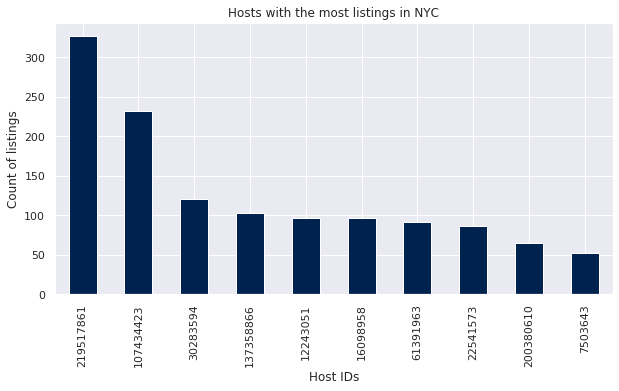

In [12]:
plt.figure(figsize=(10,5))
sns.set(rc={'figure.figsize':(8,8)})
plt1=host_id.plot(kind='bar',cmap='cividis')
plt1.set_title('Hosts with the most listings in NYC')
plt1.set_ylabel('Count of listings')
plt1.set_xlabel('Host IDs')
plt.show()

Observation : The host with maximum number of listings registered for airbnb in NewYork has 372 listings

#### Listings per neighbourhood group

Checking unique values and count in column neighborhood_group

In [13]:
data.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [14]:
data.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

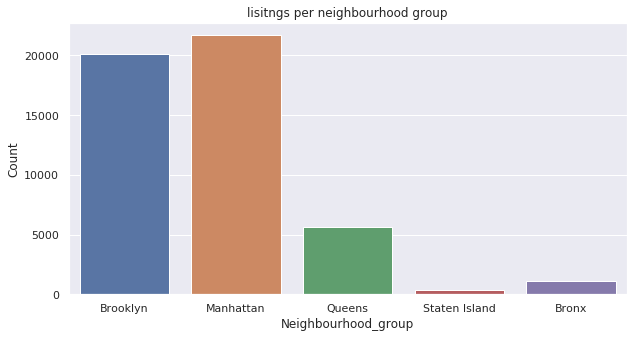

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(data.neighbourhood_group)
plt.title('lisitngs per neighbourhood group')
plt.xlabel('Neighbourhood_group')
plt.ylabel('Count')
plt.show()

Observation : 
Manhattan neighbourhood group has highest number of listings, with a count of  21661, followed by Brooklyn with a count of 20104.

#### Listings per neighbourhood

 Checking unique values and count in neighbhourhood column

In [16]:
data.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

Finding the top 10 neighbourhood data listings

In [17]:
top_neighbourhood=data.neighbourhood.value_counts().head(10)
top_neighbourhood

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

neighbourhood_group
Bronx            48
Brooklyn         47
Manhattan        32
Queens           51
Staten Island    43
Name: neighbourhood, dtype: int64


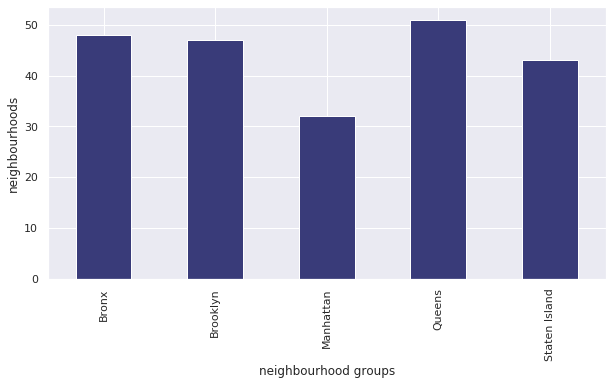

In [18]:
plt.figure(figsize=(10,5))
data.groupby('neighbourhood_group')['neighbourhood'].nunique().plot(kind='bar',colormap='tab20b')
plt.xlabel('neighbourhood groups')
plt.ylabel('neighbourhoods')
print(data.groupby('neighbourhood_group')['neighbourhood'].nunique())
plt.show()

Observation: Queens has  51 listings, which is the highest number of neighbourhoods, while Manhattan has 32 listings, the lowest number of neighbourhoods. 

#### Room type analysis

Checking the unique values and count in room type

In [19]:
data.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

Text(0.5, 1.0, 'Room types availability in AirBnB')

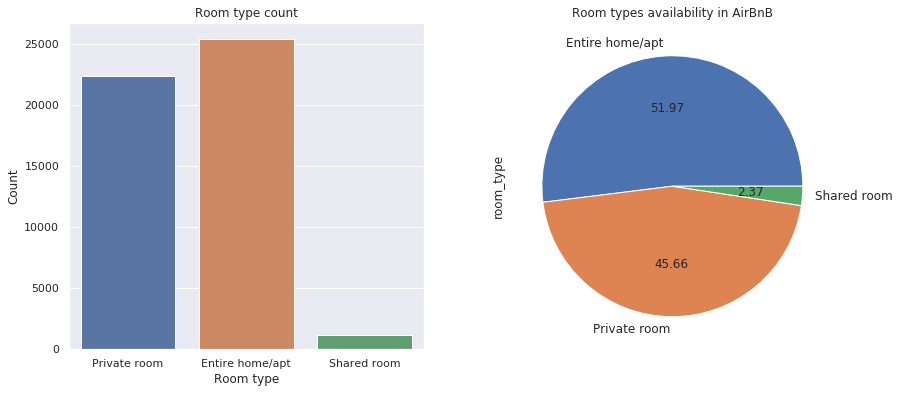

In [20]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.countplot(data.room_type)
plt.title('Room type count')
plt.xlabel('Room type')
plt.ylabel('Count')

plt.subplot(122)
b=data.room_type.value_counts()/len(data.room_type)
b.plot.pie(autopct='%.2f',fontsize=12)
plt.title('Room types availability in AirBnB')


Observation:

In all the listings registered with AirBnB, more than 50% of them offer complete houses or apartments/entire home and 46% are for private rooms. Only 2% of listings registered for shared rooms.

#### Counting the airbnb in neighbourhoods with room type category

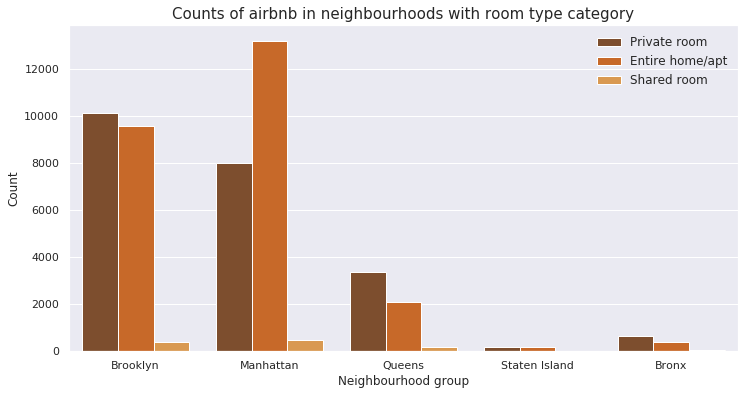

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='neighbourhood_group', hue='room_type', palette='YlOrBr_d')
plt.title('Counts of airbnb in neighbourhoods with room type category', fontsize=15)
plt.xlabel('Neighbourhood group')
plt.ylabel("Count")
plt.legend(frameon=False, fontsize=12)
plt.show()

Observation :

1. Brooklyn is a zone which has maximum listings, primarily offers private rooms while manhattan offers apartments, followed by Brooklyn.

2. Bronx, Queen and Staten Island has least number of listings registered and does not offer much of the services.

#### Plotting price range for minimum nights

In [22]:
data['price_range']=pd.qcut(data['price'],10)

Note : Applying qcut tries to price range to divide up the underlying data into equal sized bins

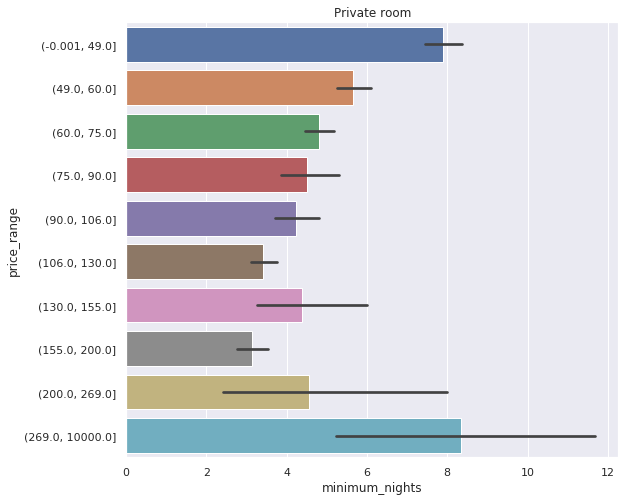

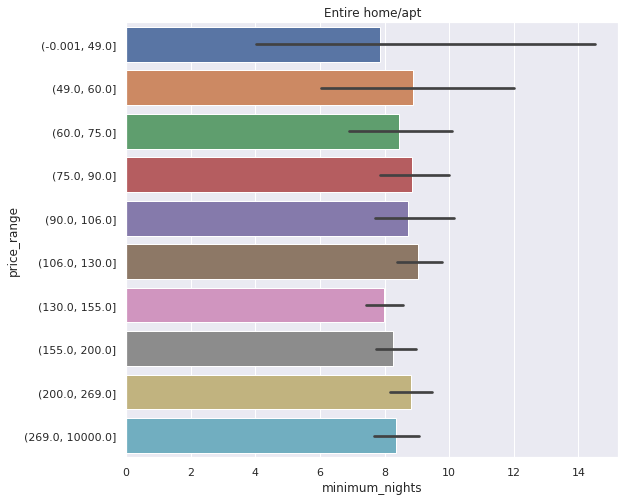

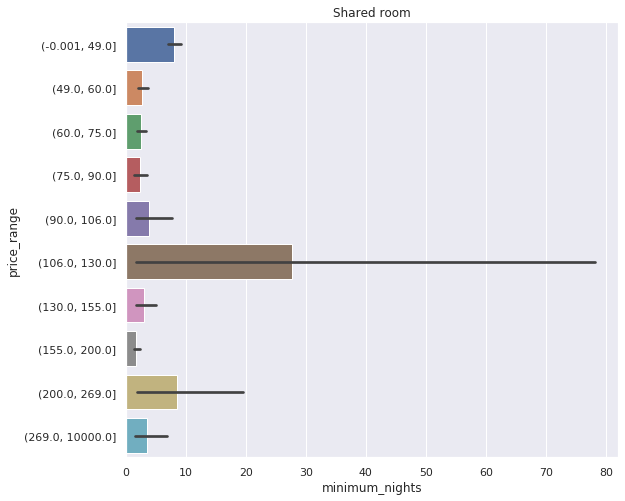

In [23]:
rooms=list(data.room_type.unique())
for i,room in enumerate(rooms):
    plt.figure(figsize=(30,8))
    plt.subplot(1,3,i+1)
    sns.barplot(y='price_range',x='minimum_nights',data=data[(data.room_type==room)])
    
    plt.title(room)

Observation : 
Price range of private rooms for duration of 8 minimum nights and above is quite on a higher side [269,10000]
whereas the Price range of Entire home/apt rooms for duration of 8 minimum nights is in the range of [49,60]


#### Price wise analysis of rooms

In [24]:
data.groupby('neighbourhood_group').price.describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,87.496792,106.709349,0.0,45.0,65.0,99.0,2500.0
Brooklyn,20104.0,124.383207,186.873538,0.0,60.0,90.0,150.0,10000.0
Manhattan,21661.0,196.875814,291.383183,0.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.517649,167.102155,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


Observation : Checking how the price is distributed with respective to neighbourhood group

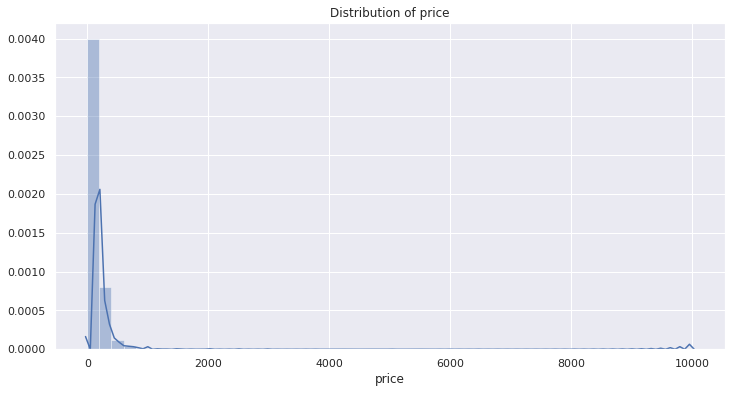

In [25]:
plt.figure(figsize=(12,6))
sns.distplot(data.price)
plt.title('Distribution of price')
plt.show()

Observation : From the above figure, we could see most of the airbnb's prices are under 2000 dollars

Borough wise price distribution

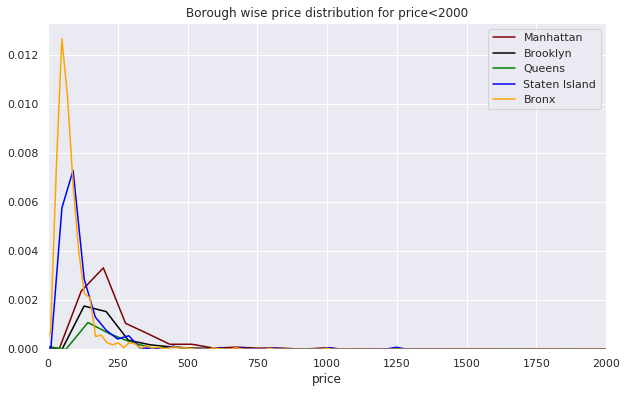

In [26]:
plt.figure(figsize=(10,6))
sns.distplot(data[data.neighbourhood_group=='Manhattan'].price,color='maroon',hist=False,label='Manhattan')
sns.distplot(data[data.neighbourhood_group=='Brooklyn'].price,color='black',hist=False,label='Brooklyn')
sns.distplot(data[data.neighbourhood_group=='Queens'].price,color='green',hist=False,label='Queens')
sns.distplot(data[data.neighbourhood_group=='Staten Island'].price,color='blue',hist=False,label='Staten Island')
sns.distplot(data[data.neighbourhood_group=='Bronx'].price,color='Orange',hist=False,label='Bronx')
plt.title('Borough wise price distribution for price<2000')
plt.xlim(0,2000)
plt.show()

Observation: 
1. Bronx area has maximum distribution below 250 dollars followed by Staten Island region
2. Manhattan area price's are little expensive compared to all other areas

#### Density and distribution of prices for each neighbhourhood_group

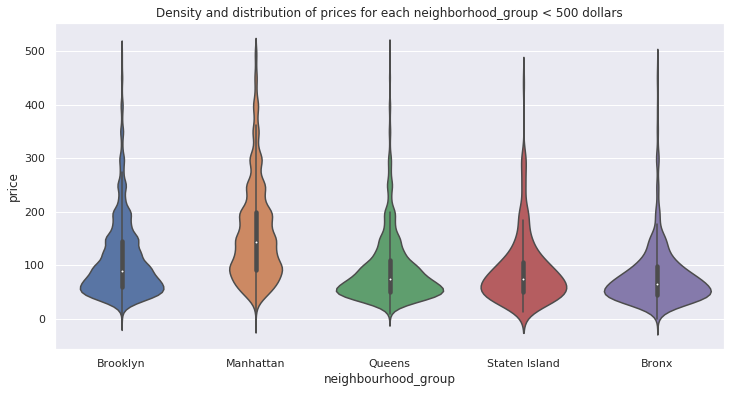

In [27]:
#creating a sub-dataframe with no extreme values / less than 500
plt2=data[data.price < 500]
#using violinplot to showcase density and distribtuion of prices
plt.figure(figsize=(12,6))
plt_2=sns.violinplot(data=plt2, x='neighbourhood_group', y='price')
plt_2.set_title('Density and distribution of prices for each neighborhood_group < 500 dollars')
plt.show()

Observation :

1. Manhattan has the highest range of prices for the listings with an average price of 150 dollars, followed by Brooklyn with 90 dollars per night. 
2. Queens and Staten Island appear to have similar distributions, Bronx is the cheapest among all of them.

#### Minimum Nights and price range

In [28]:
data.groupby(['room_type','price_range'])['minimum_nights'].describe()

count       mean         std  min  25%  \
room_type       price_range                                                 
Entire home/apt (-0.001, 49.0]     117.0   7.863248   29.105014  1.0  1.0   
                (49.0, 60.0]       285.0   8.880702   26.800774  1.0  1.0   
                (60.0, 75.0]       804.0   8.456468   23.977300  1.0  2.0   
                (75.0, 90.0]      1452.0   8.841598   20.166426  1.0  2.0   
                (90.0, 106.0]     2247.0   8.713841   30.093155  1.0  2.0   
                (106.0, 130.0]    3628.0   9.039691   21.723164  1.0  2.0   
                (130.0, 155.0]    3683.0   7.996742   18.926184  1.0  2.0   
                (155.0, 200.0]    5556.0   8.260259   24.731107  1.0  2.0   
                (200.0, 269.0]    3253.0   8.807255   18.788983  1.0  2.0   
                (269.0, 10000.0]  4384.0   8.369526   23.459741  1.0  2.0   
Private room    (-0.001, 49.0]    4291.0   7.883011   15.582768  1.0  1.0   
                (49.0, 60.0]      4621.0   5.655053   15.478208  1.0  1.0   
                (60.0, 75.0]      4219.0   4.799953   11.957915  1.0  1.0   
                (75.0, 90.0]      3129.0   4.495366   21.635023  1.0  1.0   
                (90.0, 106.0]     2270.0   4.235242   13.785078  1.0  1.0   
                (106.0, 130.0]    1562.0   3.412932    6.536482  1.0  1.0   
                (130.0, 155.0]     854.0   4.394614   21.102164  1.0  1.0   
                (155.0, 200.0]     673.0   3.147103    5.138040  1.0  1.0   
                (200.0, 269.0]     242.0   4.549587   24.433660  1.0  1.0   
                (269.0, 10000.0]   465.0   8.333333   36.615939  1.0  1.0   
Shared room     (-0.001, 49.0]     619.0   8.051696   14.419756  1.0  1.0   
                (49.0, 60.0]       130.0   2.669231    5.032281  1.0  1.0   
                (60.0, 75.0]       161.0   2.534161    5.108854  1.0  1.0   
                (75.0, 90.0]        70.0   2.257143    4.570497  1.0  1.0   
                (90.0, 106.0]       57.0   3.877193   13.220750  1.0  1.0   
                (106.0, 130.0]      40.0  27.600000  157.600078  1.0  1.0   
                (130.0, 155.0]      15.0   3.000000    3.464102  1.0  1.0   
                (155.0, 200.0]      28.0   1.714286    1.329359  1.0  1.0   
                (200.0, 269.0]      11.0   8.454545   17.494934  1.0  1.0   
                (269.0, 10000.0]    29.0   3.551724    7.023360  1.0  1.0   

                                  50%  75%     max  
room_type       price_range                         
Entire home/apt (-0.001, 49.0]    2.0  4.0   300.0  
                (49.0, 60.0]      3.0  5.0   365.0  
                (60.0, 75.0]      3.0  6.0   500.0  
                (75.0, 90.0]      3.0  7.0   365.0  
                (90.0, 106.0]     3.0  5.0   999.0  
                (106.0, 130.0]    3.0  6.0   370.0  
                (130.0, 155.0]    3.0  6.0   500.0  
                (155.0, 200.0]    3.0  5.0  1250.0  
                (200.0, 269.0]    3.0  6.0   366.0  
                (269.0, 10000.0]  3.0  5.0  1000.0  
Private room    (-0.001, 49.0]    3.0  7.0   500.0  
                (49.0, 60.0]      2.0  4.0   500.0  
                (60.0, 75.0]      2.0  4.0   365.0  
                (75.0, 90.0]      2.0  3.0   999.0  
                (90.0, 106.0]     2.0  3.0   365.0  
                (106.0, 130.0]    2.0  3.0   120.0  
                (130.0, 155.0]    2.0  3.0   365.0  
                (155.0, 200.0]    2.0  3.0    45.0  
                (200.0, 269.0]    2.0  3.0   365.0  
                (269.0, 10000.0]  2.0  3.0   365.0  
Shared room     (-0.001, 49.0]    2.0  7.0   120.0  
                (49.0, 60.0]      1.0  2.0    35.0  
                (60.0, 75.0]      1.0  2.0    30.0  
                (75.0, 90.0]      1.0  2.0    30.0  
                (90.0, 106.0]     1.0  2.0   100.0  
                (106.0, 130.0]    1.0  3.0   999.0  
                (130.0, 155.0]    2.0  3.0    15.0  
                (155.0, 200.0]   

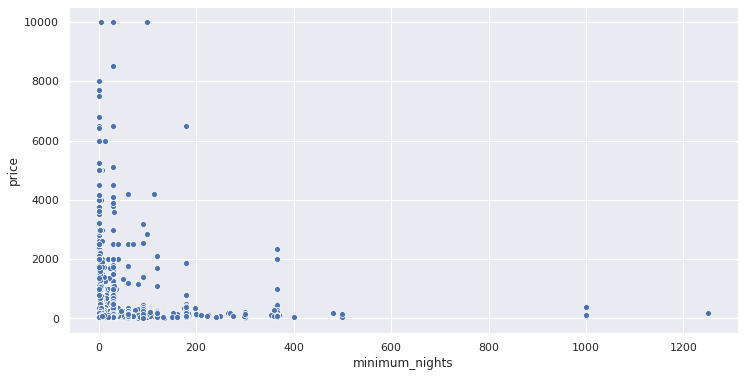

In [29]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='minimum_nights',y='price',data=data)
plt.show()

Observation : Minimum number of night stays has no significant impact on prices.

<Figure size 1080x1080 with 0 Axes>

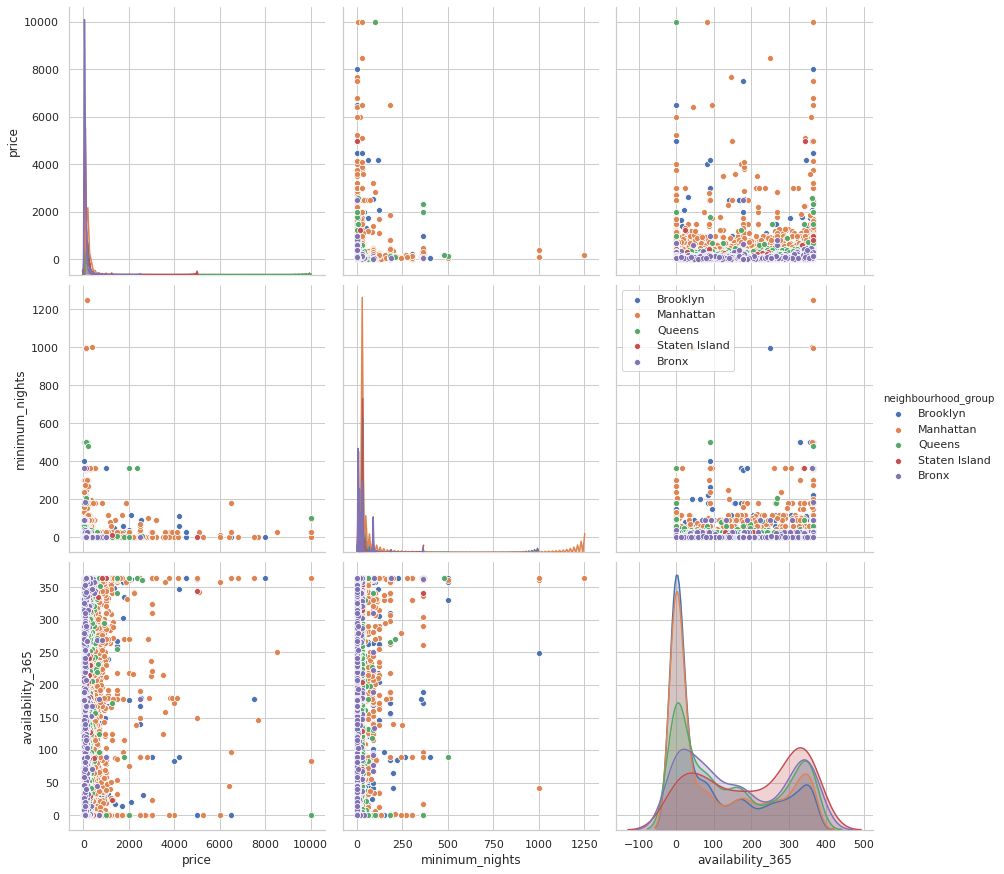

In [30]:
plt.figure(figsize=(15,15))
sns.set_style("whitegrid");
sns.pairplot(data,hue='neighbourhood_group',vars=['price','minimum_nights','availability_365'],height=4,diag_kind='kde');
plt.legend()
plt.show() 

Observation : The room prices in Manhattan and Brooklyn are more when compared to other Boroughs based on their availability and minimum night stay.

#### Area wise visualization of availability of listings

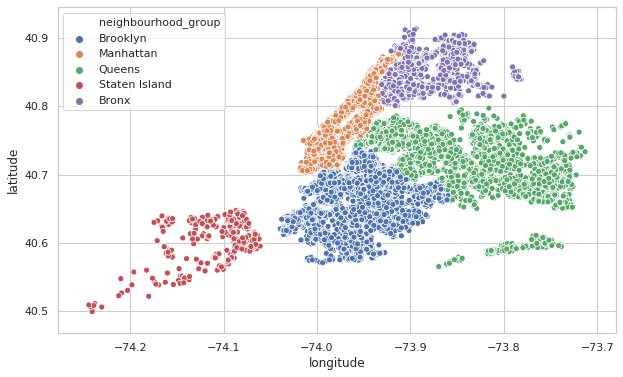

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude,data.latitude,hue=data.neighbourhood_group)
plt.ioff()

Observation : Queens area has maximum nuber of listings available in neighbourhood_group

<Figure size 720x360 with 0 Axes>

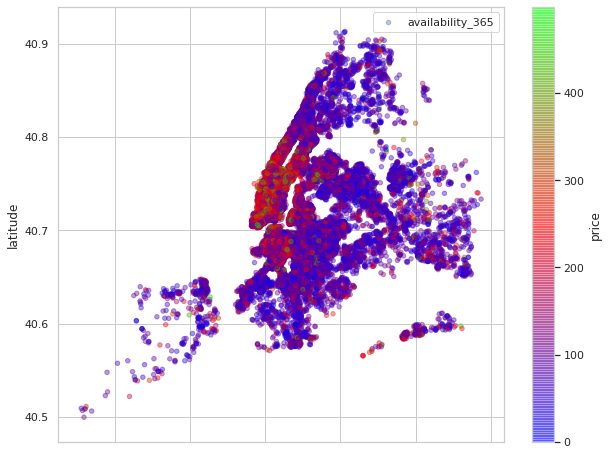

In [32]:
plt.figure(figsize=(10,5))
pl1=data[data.price<500]

pl1.plot(kind='scatter', x='longitude',y='latitude',label='availability_365',c='price',cmap=plt.get_cmap('brg'),colorbar=True,alpha=0.4,figsize=(10,8))
plt.show()

Observation : Above plot shows the map of airbnb listings and color indicates price. Red color dots are the apartment or rooms with higher price. I have considered prices upto 500$ to get a good representation on the plot. We can see that Manhattan region has more expensive apartments.

#### Room availability_365

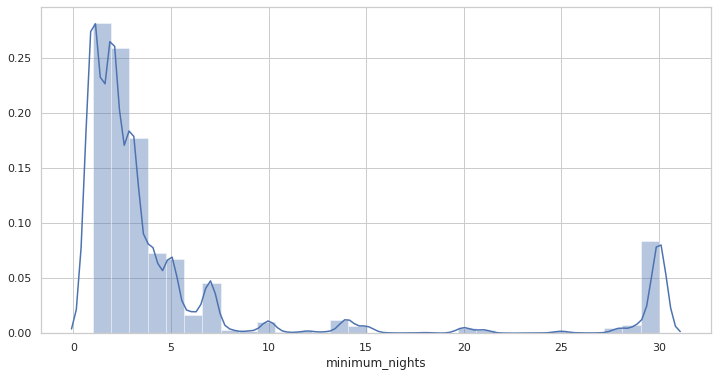

In [33]:
plt.figure(figsize=(12,6))
sns.distplot(data[(data['minimum_nights'] <= 30) & (data['minimum_nights'] > 0)]['minimum_nights'], bins=31)
plt.show()

Observation : Most of the listings have room availability booking for more than a day

#### Correlation between different variables

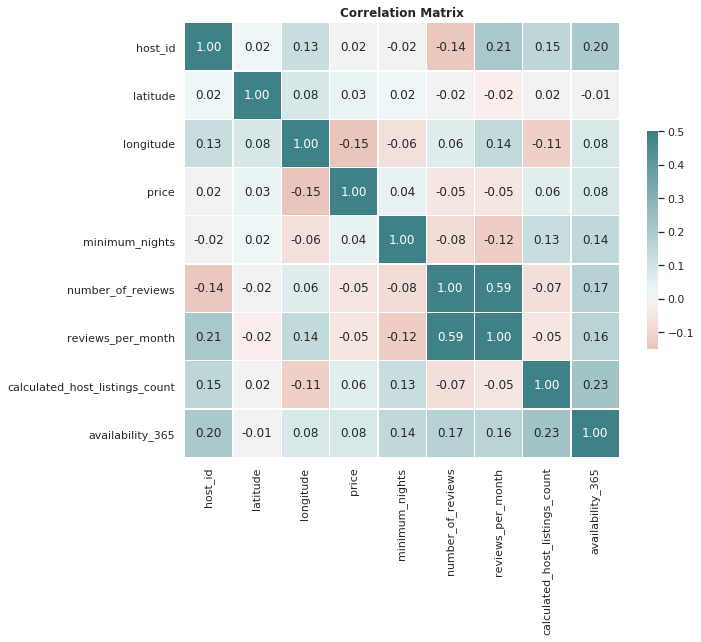

In [34]:
plt.figure(figsize=(10,8))
palette = sns.diverging_palette(20, 200, n=256)
corr=data.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.5, center=0,
            square=True, linewidths=.3, cbar_kws={"shrink": .5}).set(ylim=(9, 0))
plt.title("Correlation Matrix",size=12, weight='bold')
plt.show()

Observation :
The correlation table shows that there is no strong relationship between price and other features.

### 4. Data Modelling

In [35]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

### Statistics of sale price

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
5%          40.000000
10%         49.000000
20%         60.000000
30%         75.000000
40%         90.000000
50%        106.000000
60%        130.000000
70%        155.000000
80%        200.000000
90%        269.000000
95%        355.000000
99%        799.000000
max      10000.000000
Name: price, dtype: float64


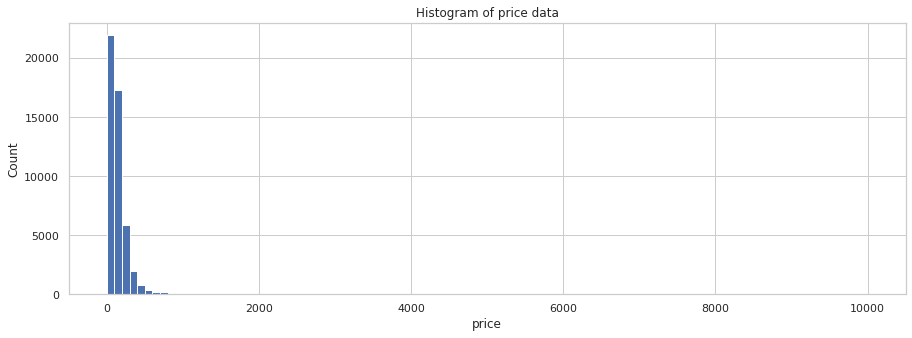

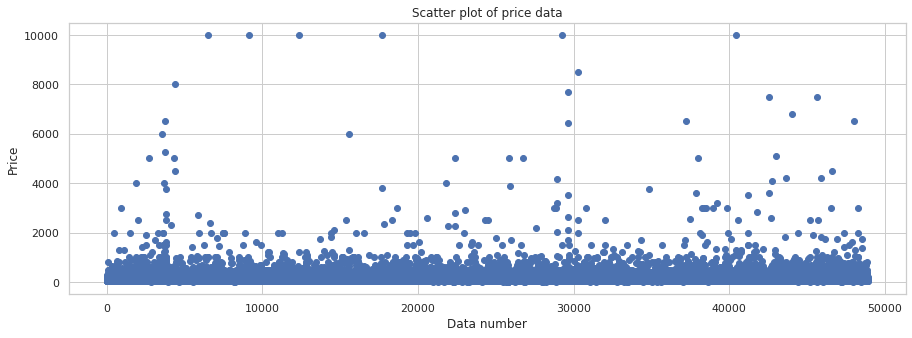

In [36]:
print(data.price.describe(percentiles=[0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99]))

plt.figure(figsize=(15,5))
plt.hist(data.price,bins=100)
plt.xlabel('price')
plt.ylabel("Count")
plt.title('Histogram of price data')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(data.price,'o',markersize=6)
# plt.hist(data.price,bins=100)
plt.xlabel('Data number')
plt.ylabel("Price")
plt.title('Scatter plot of price data')
plt.show()

Observation: From the above figure, it is observed that the maximum number of data points are below 355 dollars.

#### Note : 
Based on the above results, I wanted to find predictions only for the 95% of price data set with all features and with few features considering above 95% as outliers. Hence I divided the data modelling into two phases :

Phase I ---- taking all features (columns) into consideration and checking for the error and price predictions
    

Phase II ---- taking only few features (columns) into consideration and checking for the error and price predictions
    

### Phase I - Modeling on price dataset with all features

Considering the above figure, as 95% of data falls at 355 dollars, I am implementing ML techinques on lower data set.

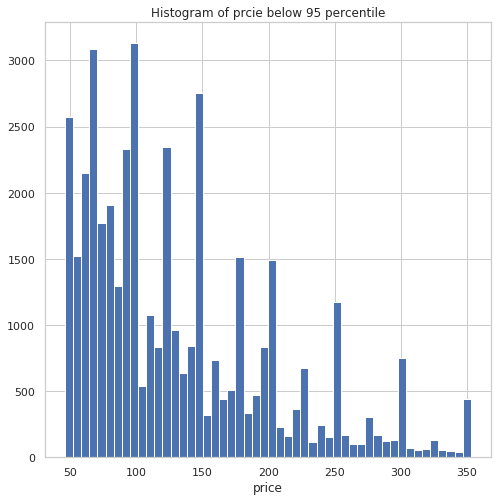

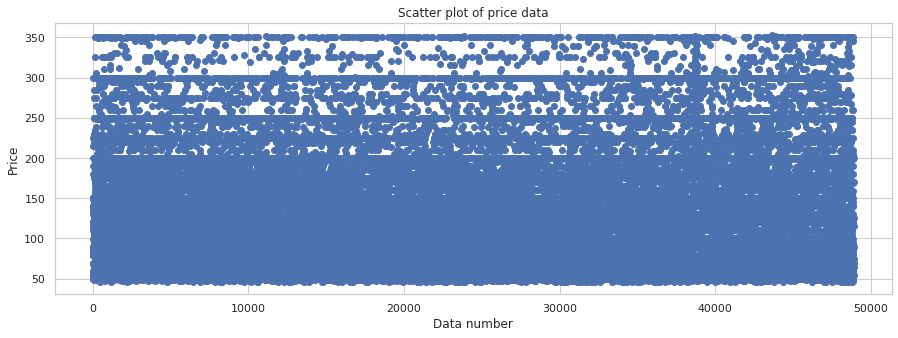

In [37]:
import copy

data_ML_95percent=copy.deepcopy(data)
data_ML_95percent=data_ML_95percent[data_ML_95percent['price']<355]
data_ML_95percent=data_ML_95percent[data_ML_95percent['price']>45]
data_ML_95percent=data_ML_95percent.drop(columns="price_range")

plt.figure()
plt.hist(data_ML_95percent.price,bins=50)
plt.xlabel('price')
plt.title('Histogram of prcie below 95 percentile')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(data_ML_95percent.price,'o',markersize=6)
plt.xlabel('Data number')
plt.ylabel("Price")
plt.title('Scatter plot of price data')
plt.show()

Observation : From the above figure, we can see there is a uniform density of data points below 355$

In [38]:
#encoding for categorical data
cat_columns = data_ML_95percent.select_dtypes(include=['object']).columns.values 

print("Catergory columns:",cat_columns)
for arg in cat_columns:
    
    labels = preprocessing.LabelEncoder()

    labels.fit(data_ML_95percent[arg])
    data_ML_95percent[arg]=labels.transform(data_ML_95percent[arg])

display(data_ML_95percent.head())

Catergory columns: ['neighbourhood_group' 'neighbourhood' 'room_type']


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,1,107,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,2845,2,126,40.75362,-73.98377,0,225,1,45,0.38,2,355
2,4632,2,93,40.80902,-73.94190,1,150,3,0,0.00,1,365
3,4869,1,41,40.68514,-73.95976,0,89,1,270,4.64,1,194
4,7192,2,61,40.79851,-73.94399,0,80,10,9,0.10,1,0


Note : By using label encoder, we are converting the label values into numeric form to use in the ML techniques.

Spliting the data to Train-Test data

In [39]:
X = copy.deepcopy(data_ML_95percent)
y = X.pop('price')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print("Training data shape:",X_train.shape[0])
print("Test data shape:",X_test.shape[0])

Training data shape: 33784
Test data shape: 8446


###### Below metrics are needed for evaluating predictions :

Mean Absolute Error (MAE) shows the difference between predictions and actual values.

Mean Squared Error (MSE) measures the average squared difference between the estimated values and true values.

R^2 will be calculated to find the goodness of fit measure


### Model I - Linear Regression

MAE (Mean Absolute Error): 31.307070252513057
MSE (Mean Squared Error): 13.882722066944464
R2 score: 0.3729066141144669


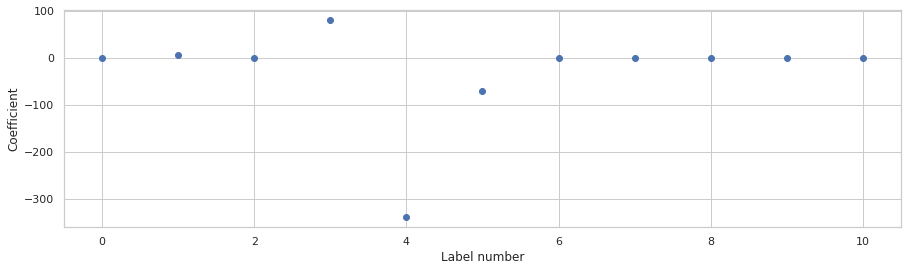

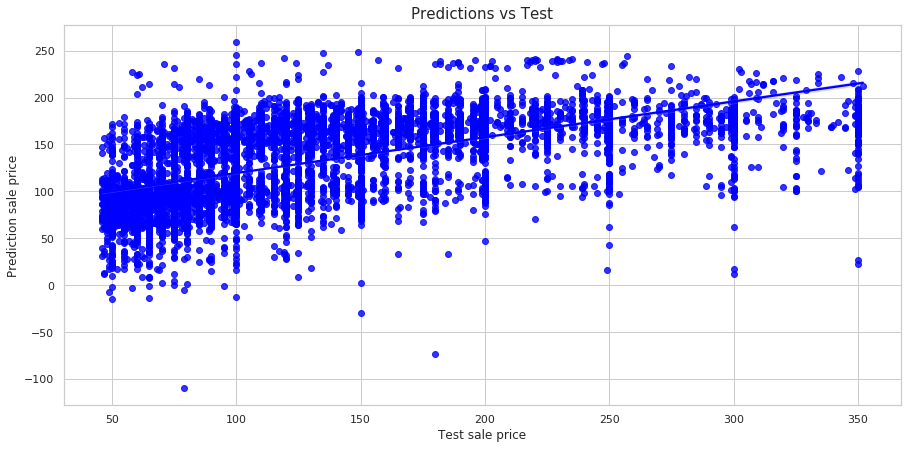

In [40]:
lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)/metrics.mean_absolute_error(y_test, y_pred*0)*100
mse = metrics.mean_squared_error(y_test, y_pred)/metrics.mean_squared_error(y_test, y_pred*0)*100
r2 = metrics.r2_score(y_test, y_pred)

print('MAE (Mean Absolute Error): %s' %mae)
print('MSE (Mean Squared Error): %s' %mse)
print('R2 score: %s' %r2)

plt.figure(figsize=(15,4))
plt.plot(lm.coef_,'o')
plt.xlabel("Label number")
plt.ylabel("Coefficient")
plt.show()

plt.figure(figsize=(15,7))
sns.regplot(x=y_test, y=y_pred, color='blue')
plt.title('Predictions vs Test', fontsize=15)
plt.xlabel('Test sale price')
plt.ylabel('Prediction sale price')
plt.show()

Observation : Using linear regression, the mean square error is around 13.88 and MAE is 31.3. Also, I could see the sale price goes into negative values. We can avoid negative values by fitting the linear regression to log values of price. 

### Linear regression to fit log values of sale price

MAE (Mean Absolute Error) of training data: 29.6362294517147
MSE (Mean Squared Error) of training data: 13.9035187544641
R2 score: 0.37397291768703245
---------------------------------------------------
MAE (Mean Absolute Error) of test data: 29.865349415039173
MSE (Mean Squared Error) of test data: 14.045708105246677
R2 score: 0.3655444076164801


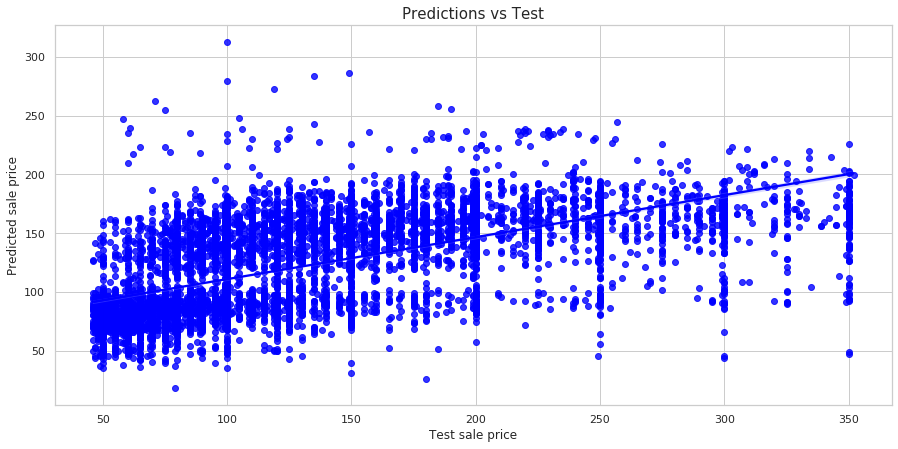

In [41]:
#Fitting linear regression to logorithm of sale price to avoid negative values
lm = LinearRegression(normalize=True)

y_train_log10=np.log10(y_train)
lm.fit(X_train, y_train_log10)

y_pred = lm.predict(X_train)
y_pred=10**y_pred

mae_train = metrics.mean_absolute_error(y_train, y_pred)/metrics.mean_absolute_error(y_train, y_pred*0)*100
mse_train = metrics.mean_squared_error(y_train, y_pred)/metrics.mean_squared_error(y_train, y_pred*0)*100
r2 = metrics.r2_score(y_train,y_pred)


print('MAE (Mean Absolute Error) of training data: %s' %mae_train)
print('MSE (Mean Squared Error) of training data: %s' %mse_train)
print('R2 score: %s' %r2)
print("---------------------------------------------------")

y_pred = lm.predict(X_test)
y_pred=10**y_pred

mae = metrics.mean_absolute_error(y_test, y_pred)/metrics.mean_absolute_error(y_test, y_pred*0)*100
mse = metrics.mean_squared_error(y_test, y_pred)/metrics.mean_squared_error(y_test, y_pred*0)*100
r2 = metrics.r2_score(y_test, y_pred)

print('MAE (Mean Absolute Error) of test data: %s' %mae)
print('MSE (Mean Squared Error) of test data: %s' %mse)
print('R2 score: %s' %r2)

plt.figure(figsize=(15,7))
sns.regplot(x=y_test, y=y_pred, color='blue')
plt.title('Predictions vs Test', fontsize=15)
plt.xlabel('Test sale price')
plt.ylabel('Predicted sale price')
plt.show()

Observation : The accuracy did not improve much by fitting linear regression to log of price. However, there are no negtive price values in the predictions

### Model II - K-NN

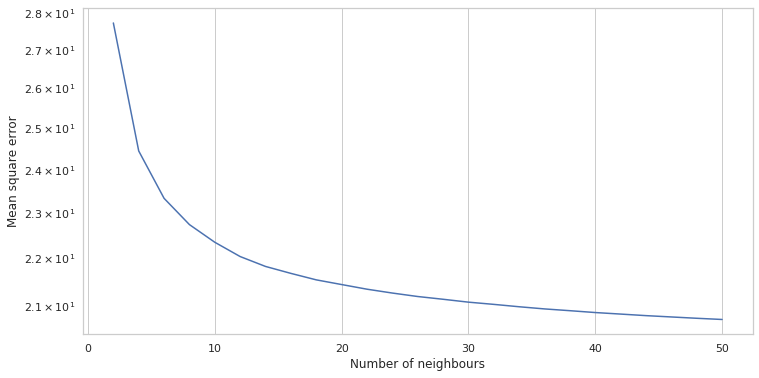

In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

mae_all=[]
mse_all=[]
rmse_all=[]
accuracy_array = []

k_array = range(2,52,2)
for k in k_array:
    knn = KNeighborsRegressor(n_neighbors=k,weights='distance')

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
        
    mae = metrics.mean_absolute_error(y_test, y_pred)/metrics.mean_absolute_error(y_test, y_pred*0)*100
    mse = metrics.mean_squared_error(y_test, y_pred)/metrics.mean_squared_error(y_test, y_pred*0)*100
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))/np.sqrt(metrics.mean_squared_error(y_test, y_pred*0))*100
    
    mae_all.append(mae)
    mse_all.append(mse)
    rmse_all.append(rmse)

plt.figure(figsize=(12,6))
plt.semilogy(k_array,mse_all)
plt.xlabel("Number of neighbours")
plt.ylabel("Mean square error")
plt.show()

Optimal value of K is 50 
MAE (Mean Absolute Error) of test data: 38.36991669198689
MSE (Mean Squared Error) of test data: 20.714747885738042
R2 score: 0.06429867811279122


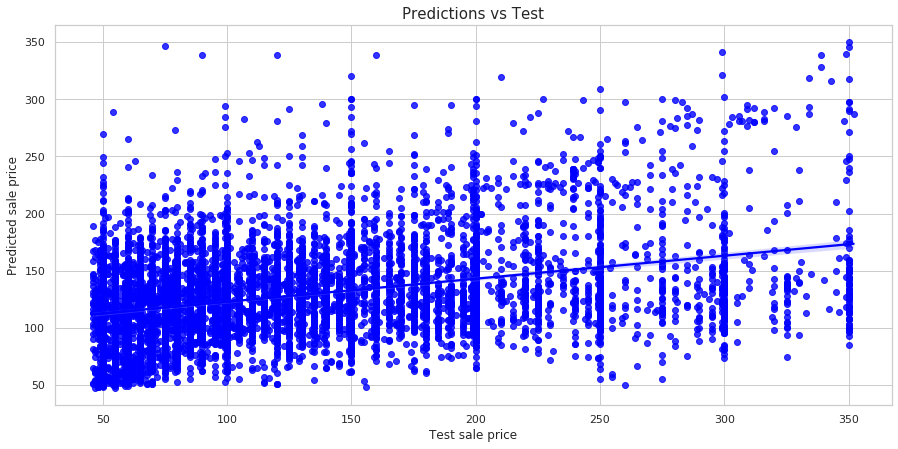

In [43]:
min_ind=np.argmin(mse_all)
OptK = k_array[min_ind]
print ("Optimal value of K is %d " %  OptK)

knn = KNeighborsRegressor(n_neighbors=k,weights='distance')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)/metrics.mean_absolute_error(y_test, y_pred*0)*100
mse = metrics.mean_squared_error(y_test, y_pred)/metrics.mean_squared_error(y_test, y_pred*0)*100
r2 = metrics.r2_score(y_test, y_pred)


print('MAE (Mean Absolute Error) of test data: %s' %mae)
print('MSE (Mean Squared Error) of test data: %s' %mse)
print('R2 score: %s' %r2)

plt.figure(figsize=(15,7))
sns.regplot(x=y_test, y=y_pred, color='blue')
plt.title('Predictions vs Test', fontsize=15)
plt.xlabel('Test sale price')
plt.ylabel('Predicted sale price')
plt.show()


Observation : The mean absolute error and mean square error for KNN are high compared to linear regression but there are no negative values in predictions even without applying log to the sale price.

### Model III - Decision Tree Regression

MAE (Mean Absolute Error) of training data: 25.08374405285497
MSE (Mean Squared Error) of training data: 10.385254739772556
RMSE (Root mean squared error) of training data: 32.226161328604675
R2 score: 0.5323881070229604
---------------------------------------------------
MAE (Mean Absolute Error) of test data: 26.649730591760207
MSE (Mean Squared Error) of test data: 11.67156329299078
RMSE (Root mean squared error) of test data: 34.163669728222665
R2 score: 0.47278638089238856


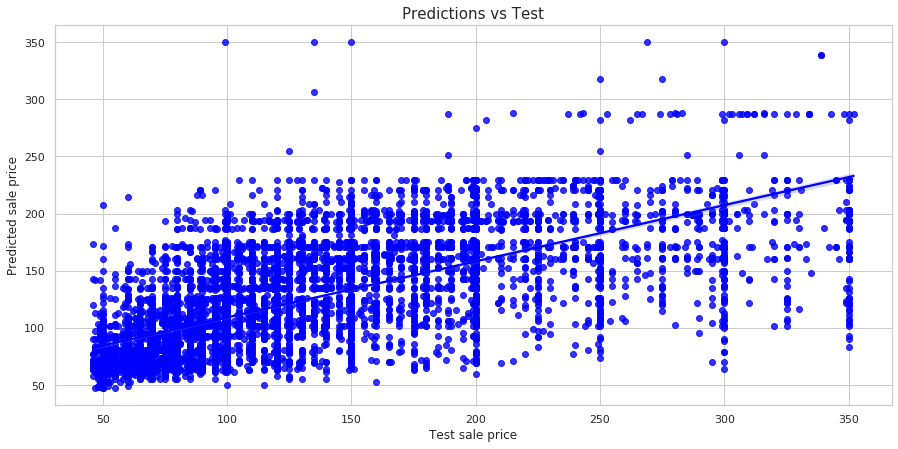

In [44]:
from sklearn.tree import DecisionTreeRegressor

y_train_log10=np.log10(y_train)

dtr = DecisionTreeRegressor(max_depth=9)
dtr.fit(X_train, y_train_log10)

y_pred = dtr.predict(X_train)
y_pred=10**y_pred

mae_train = metrics.mean_absolute_error(y_train, y_pred)/metrics.mean_absolute_error(y_train, y_pred*0)*100
mse_train = metrics.mean_squared_error(y_train, y_pred)/metrics.mean_squared_error(y_train, y_pred*0)*100
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred))/np.sqrt(metrics.mean_squared_error(y_train, y_pred*0))*100
r2 = metrics.r2_score(y_train,y_pred)


print('MAE (Mean Absolute Error) of training data: %s' %mae_train)
print('MSE (Mean Squared Error) of training data: %s' %mse_train)
print('RMSE (Root mean squared error) of training data: %s' %rmse_train)
print('R2 score: %s' %r2)
print("---------------------------------------------------")

y_pred = dtr.predict(X_test)
y_pred=10**y_pred

mae = metrics.mean_absolute_error(y_test, y_pred)/metrics.mean_absolute_error(y_test, y_pred*0)*100
mse = metrics.mean_squared_error(y_test, y_pred)/metrics.mean_squared_error(y_test, y_pred*0)*100
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))/np.sqrt(metrics.mean_squared_error(y_test, y_pred*0))*100
r2 = metrics.r2_score(y_test, y_pred)

print('MAE (Mean Absolute Error) of test data: %s' %mae)
print('MSE (Mean Squared Error) of test data: %s' %mse)
print('RMSE (Root mean squared error) of test data: %s' %rmse)
print('R2 score: %s' %r2)

plt.figure(figsize=(15,7))
sns.regplot(x=y_test, y=y_pred, color='blue')
plt.title('Predictions vs Test', fontsize=15)
plt.xlabel('Test sale price')
plt.ylabel('Predicted sale price')
plt.show()

Observation : Using decision tree regression, the mean absolute and mean squared error has improved.

### Model IV - Random Forset Regression

MAE (Mean Absolute Error) of training data: 25.3107699013299
MSE (Mean Squared Error) of training data: 10.580506161934885
R2 score: 0.5235966147185755
---------------------------------------------------
MAE (Mean Absolute Error) of test data: 26.020173722015794
MSE (Mean Squared Error) of test data: 11.213901350832948
R2 score: 0.4934593278486673


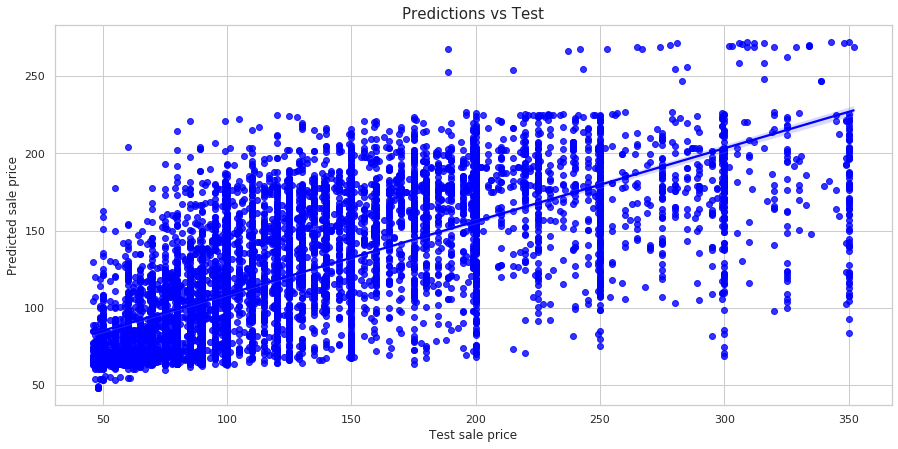

In [45]:
from sklearn.ensemble import RandomForestRegressor

y_train_log10=np.log10(y_train)
rfr = RandomForestRegressor(max_depth=8, n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train_log10)

y_pred = rfr.predict(X_train)
y_pred=10**y_pred

mae_train = metrics.mean_absolute_error(y_train, y_pred)/metrics.mean_absolute_error(y_train, y_pred*0)*100
mse_train = metrics.mean_squared_error(y_train, y_pred)/metrics.mean_squared_error(y_train, y_pred*0)*100
r2 = metrics.r2_score(y_train,y_pred)

print('MAE (Mean Absolute Error) of training data: %s' %mae_train)
print('MSE (Mean Squared Error) of training data: %s' %mse_train)
print('R2 score: %s' %r2)
print("---------------------------------------------------")

y_pred = rfr.predict(X_test)
y_pred=10**y_pred

mae = metrics.mean_absolute_error(y_test, y_pred)/metrics.mean_absolute_error(y_test, y_pred*0)*100
mse = metrics.mean_squared_error(y_test, y_pred)/metrics.mean_squared_error(y_test, y_pred*0)*100
r2 = metrics.r2_score(y_test, y_pred)

print('MAE (Mean Absolute Error) of test data: %s' %mae)
print('MSE (Mean Squared Error) of test data: %s' %mse)
print('R2 score: %s' %r2)

plt.figure(figsize=(15,7))
sns.regplot(x=y_test, y=y_pred, color='blue')
plt.title('Predictions vs Test', fontsize=15)
plt.xlabel('Test sale price')
plt.ylabel('Predicted sale price')
plt.show()


Observation : Random forest regression gives the same results like decision tree, I just wanted to check whether accuracy improves using this model.

### Phase II - Modeling on price dataset with few features

Considering the coorelation output in EDA, I wanted to check the mean square error output by omitting few features like "latitude","longitude","host_id","price_range". I want to repeat the same above process with lower price data  to find the best accurate results.

In [46]:
import copy

data_few_95percent=copy.deepcopy(data)
data_few_95percent=data_few_95percent[data_few_95percent['price']<355]
data_few_95percent=data_few_95percent[data_few_95percent['price']>45]
data_few_95percent=data_few_95percent.drop(columns="price_range")
data_few_95percent=data_few_95percent.drop(columns="host_id")
data_few_95percent=data_few_95percent.drop(columns="latitude")
data_few_95percent=data_few_95percent.drop(columns="longitude")


In [47]:
#encoding for categorical data
cat_columns = data_few_95percent.select_dtypes(include=['object']).columns.values 

print("Catergory columns:",cat_columns)
for arg in cat_columns:
    
    labels = preprocessing.LabelEncoder()

    labels.fit(data_few_95percent[arg])
    data_few_95percent[arg]=labels.transform(data_few_95percent[arg])

display(data_few_95percent.head())

Catergory columns: ['neighbourhood_group' 'neighbourhood' 'room_type']


,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,107,1,149,1,9,0.21,6,365
1,2,126,0,225,1,45,0.38,2,355
2,2,93,1,150,3,0,0.00,1,365
3,1,41,0,89,1,270,4.64,1,194
4,2,61,0,80,10,9,0.10,1,0


Spliting the data to Train-Test data

In [48]:
X = copy.deepcopy(data_few_95percent)
y = X.pop('price')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print("Training data shape:",X_train.shape[0])
print("Test data shape:",X_test.shape[0])


Training data shape: 33784
Test data shape: 8446


### Model I - Linear Regression

MAE (Mean Absolute Error): 32.87007882849926
MSE (Mean Squared Error): 14.889771979337327
R2 score: 0.3274173839567991


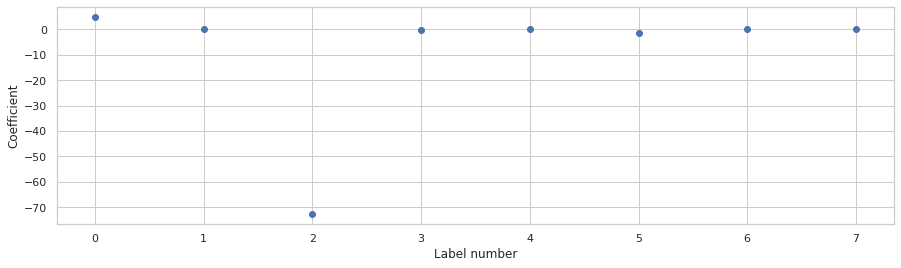

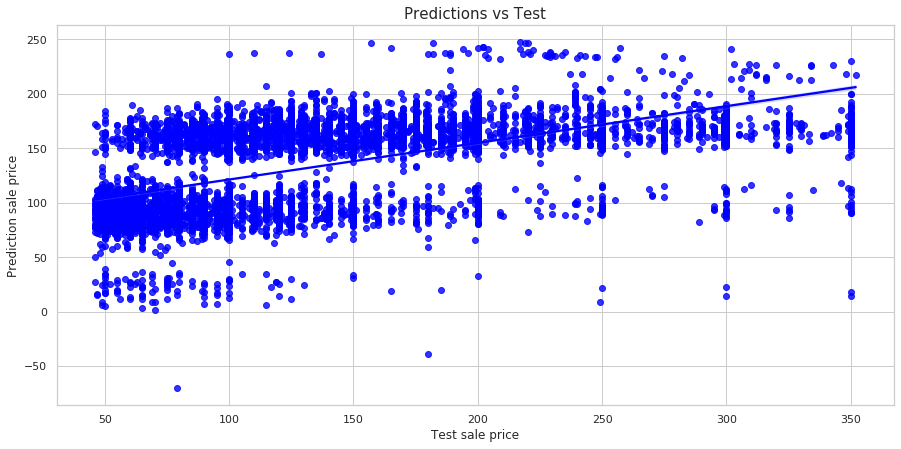

In [49]:
lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)/metrics.mean_absolute_error(y_test, y_pred*0)*100
mse = metrics.mean_squared_error(y_test, y_pred)/metrics.mean_squared_error(y_test, y_pred*0)*100
r2 = metrics.r2_score(y_test, y_pred)

print('MAE (Mean Absolute Error): %s' %mae)
print('MSE (Mean Squared Error): %s' %mse)
print('R2 score: %s' %r2)

plt.figure(figsize=(15,4))
plt.plot(lm.coef_,'o')
plt.xlabel("Label number")
plt.ylabel("Coefficient")
plt.show()

plt.figure(figsize=(15,7))
sns.regplot(x=y_test, y=y_pred, color='blue')
plt.title('Predictions vs Test', fontsize=15)
plt.xlabel('Test sale price')
plt.ylabel('Prediction sale price')
plt.show()


Observation : Using linear regression, the mean square error for the test data is around 14.88 and MAE is 32.8, which is higher than compared to the model with using all features

### Model II - K-NN 


Optimal value of K is 24 
Test data: 8446
MAE (Mean Absolute Error) of test data: 37.30916402108271
MSE (Mean Squared Error) of test data: 18.205046404256642
R2 score: 0.17766385188742562


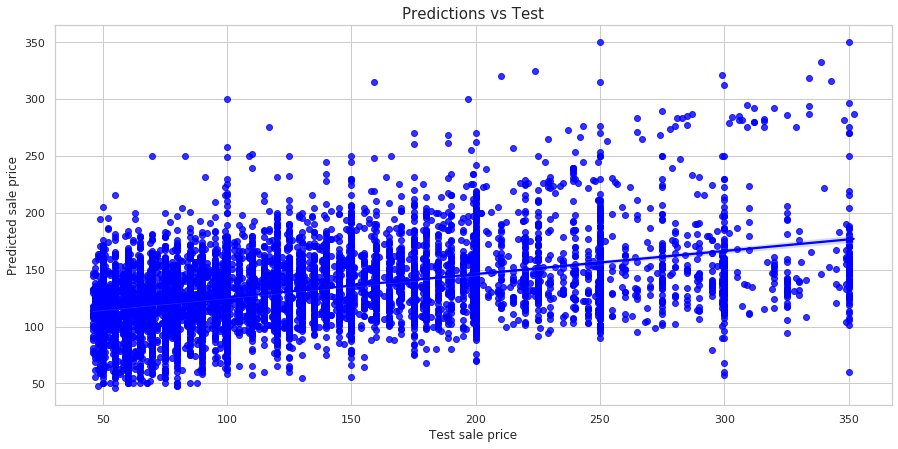

In [50]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

mae_all=[]
mse_all=[]
rmse_all=[]
accuracy_array = []

k_array = range(2,52,2)
for k in k_array:
    knn = KNeighborsRegressor(n_neighbors=k,weights='distance')

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
        
    mae = metrics.mean_absolute_error(y_test, y_pred)/metrics.mean_absolute_error(y_test, y_pred*0)*100
    mse = metrics.mean_squared_error(y_test, y_pred)/metrics.mean_squared_error(y_test, y_pred*0)*100
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))/np.sqrt(metrics.mean_squared_error(y_test, y_pred*0))*100
    
    mae_all.append(mae)
    mse_all.append(mse)
    rmse_all.append(rmse)
    
min_ind=np.argmin(mse_all)
OptK = k_array[min_ind]
print ("Optimal value of K is %d " %  OptK)

knn = KNeighborsRegressor(n_neighbors=k,weights='distance')
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)/metrics.mean_absolute_error(y_test, y_pred*0)*100
mse = metrics.mean_squared_error(y_test, y_pred)/metrics.mean_squared_error(y_test, y_pred*0)*100
r2 = metrics.r2_score(y_test, y_pred)

print("Test data:",X_test.shape[0])
print('MAE (Mean Absolute Error) of test data: %s' %mae)
print('MSE (Mean Squared Error) of test data: %s' %mse)
print('R2 score: %s' %r2)

plt.figure(figsize=(15,7))
sns.regplot(x=y_test, y=y_pred, color='blue')
plt.title('Predictions vs Test', fontsize=15)
plt.xlabel('Test sale price')
plt.ylabel('Predicted sale price')
plt.show()


Observation : Using K-NN,we could see the k- optimum is 24, the mean square error is around 18.2 and MAE is 37.3, which are slight high when compared to linear regression

### Model III - Decision Tree Regression

MAE (Mean Absolute Error) of training data: 26.51448358325423
MSE (Mean Squared Error) of training data: 11.530476706812905
R2 score: 0.4808227458156188
---------------------------------------------------
MAE (Mean Absolute Error) of test data: 27.8415782096138
MSE (Mean Squared Error) of test data: 12.555660783116068
R2 score: 0.432851007565593


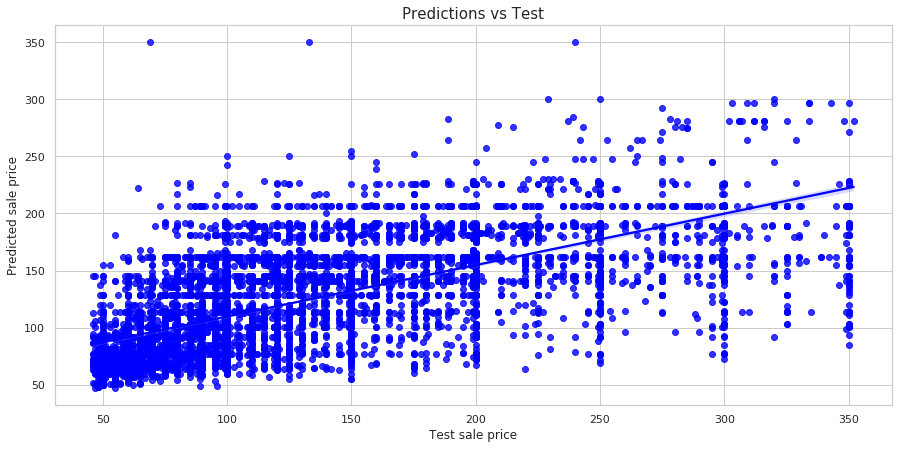

In [51]:
from sklearn.tree import DecisionTreeRegressor

y_train_log10=np.log10(y_train)

dtr = DecisionTreeRegressor(max_depth=9)
dtr.fit(X_train, y_train_log10)

y_pred = dtr.predict(X_train)
y_pred=10**y_pred

mae_train = metrics.mean_absolute_error(y_train, y_pred)/metrics.mean_absolute_error(y_train, y_pred*0)*100
mse_train = metrics.mean_squared_error(y_train, y_pred)/metrics.mean_squared_error(y_train, y_pred*0)*100
r2 = metrics.r2_score(y_train,y_pred)



print('MAE (Mean Absolute Error) of training data: %s' %mae_train)
print('MSE (Mean Squared Error) of training data: %s' %mse_train)
print('R2 score: %s' %r2)
print("---------------------------------------------------")

y_pred = dtr.predict(X_test)
y_pred=10**y_pred

mae = metrics.mean_absolute_error(y_test, y_pred)/metrics.mean_absolute_error(y_test, y_pred*0)*100
mse = metrics.mean_squared_error(y_test, y_pred)/metrics.mean_squared_error(y_test, y_pred*0)*100
r2 = metrics.r2_score(y_test, y_pred)


print('MAE (Mean Absolute Error) of test data: %s' %mae)
print('MSE (Mean Squared Error) of test data: %s' %mse)
print('R2 score: %s' %r2)

plt.figure(figsize=(15,7))
sns.regplot(x=y_test, y=y_pred, color='blue')
plt.title('Predictions vs Test', fontsize=15)
plt.xlabel('Test sale price')
plt.ylabel('Predicted sale price')
plt.show()


Observation : Decision tree gives an error of 12.55 when compared to the linear and K-NN models

### Model IV -  Random Forest Regression

MAE (Mean Absolute Error) of training data: 26.777510376398645
MSE (Mean Squared Error) of training data: 11.648561846249102
R2 score: 0.4755057827783282
---------------------------------------------------
MAE (Mean Absolute Error) of test data: 27.606605823582655
MSE (Mean Squared Error) of test data: 12.26202900660518
R2 score: 0.44611458397718395


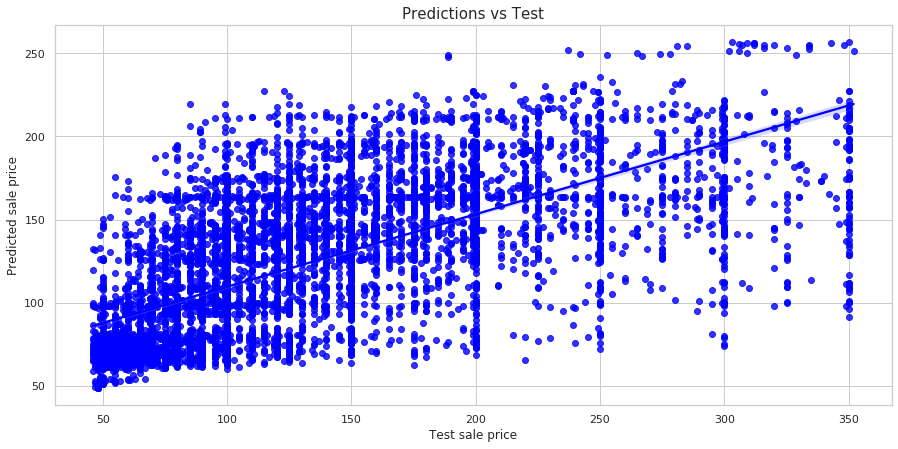

In [52]:
from sklearn.ensemble import RandomForestRegressor

y_train_log10=np.log10(y_train)
rfr = RandomForestRegressor(max_depth=8, n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train_log10)

y_pred = rfr.predict(X_train)
y_pred=10**y_pred

mae_train = metrics.mean_absolute_error(y_train, y_pred)/metrics.mean_absolute_error(y_train, y_pred*0)*100
mse_train = metrics.mean_squared_error(y_train, y_pred)/metrics.mean_squared_error(y_train, y_pred*0)*100
r2 = metrics.r2_score(y_train,y_pred)


print('MAE (Mean Absolute Error) of training data: %s' %mae_train)
print('MSE (Mean Squared Error) of training data: %s' %mse_train)
print('R2 score: %s' %r2)
print("---------------------------------------------------")

y_pred = rfr.predict(X_test)
y_pred=10**y_pred

mae = metrics.mean_absolute_error(y_test, y_pred)/metrics.mean_absolute_error(y_test, y_pred*0)*100
mse = metrics.mean_squared_error(y_test, y_pred)/metrics.mean_squared_error(y_test, y_pred*0)*100
r2 = metrics.r2_score(y_test, y_pred)

print('MAE (Mean Absolute Error) of test data: %s' %mae)
print('MSE (Mean Squared Error) of test data: %s' %mse)
print('R2 score: %s' %r2)

plt.figure(figsize=(15,7))
sns.regplot(x=y_test, y=y_pred, color='blue')
plt.title('Predictions vs Test', fontsize=15)
plt.xlabel('Test sale price')
plt.ylabel('Predicted sale price')
plt.show()


Observation : Random forest regression gives accurate results, with MSE of 12.26 and MAE of 27.60, when compared to other models  

### 5. Model Evaluation

Among the ML learning models  used in this project, KNN model gives least accuracy and random forest regression predicts the sale price with best accuracy. 

#### Phase I : Considering with all features

| Metrics | Linear Regression |   K-NN   | Decision Tree Regression | Random Forest Regression |
| --- |  |  |  |  |
| Mean Absolute Error | 29.86 | 38.36 | 26.63 | 26.02 |
|  |  |  |  |  |
| Mean Squared Error | 13.90 | 20.71 | 11.65 | 11.21 |
|  |  |  |  |  |
| R^2 | 0.37 | 0.06 | 0.47 | 0.49 |

#### Phase II : Considering with few features

| Metrics | Linear Regression |  K-NN   | Decision Tree Regression | Random Forest Regression|
| --- |  |  |  |  |
| Mean Absolute Error | 32.87 | 37.30 | 27.85 | 27.60 |
|  |  |  |  |  |
| Mean Squared Error | 14.88 | 18.20 | 12.55 | 12.26 |
|  |  |  |  |  |
| R^2 | 0.32 | 0.17 | 0.43 | 0.44 |

### 6. Conclusion

1. From the overall data, it is observed that Manhattan and Brooklyn  are the busiest areas with maximum number of tourists.

2. Mostly the price range of airbnbs in and around Newyork city are below 355 dollars.

3. Data modelling by using few parameters did not give any good results.

4. Among the ML models used in this project, Random Forest regression seems to be providing the best accurate results for both the phases that I  have considered.



### 7. References

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

https://www.dataquest.io/blog/understanding-regression-error-metrics/